KIỂM TRA TỔNG THỂ FILE

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8, 5)

DATA_PATH = "../data/cleaned/Final.csv"
df = pd.read_csv(DATA_PATH)

df.head()


,Price_Billion,Price_Per_m2,Area_m2,District,Ward,Bedrooms,Is_MatTien,Width_m,Floors,Is Hem,Post Time,Toilets,Segment
0,3.99,88.67,45.0,Quận 4,8,3.0,1,4.5,1.0,0,4/1/2026,3.0,Bình dân
1,1.80,50.00,36.0,Quận 4,4,3.0,1,4.0,1.0,0,31/12/2025,3.0,Bình dân
2,3.15,70.00,45.0,Quận 4,15,3.0,1,4.0,3.5,0,30/12/2025,3.0,Bình dân
3,22.00,79.42,277.0,Quận 4,16,6.0,0,9.0,7.0,1,30/12/2025,6.0,Bình dân
4,3.80,171.17,22.2,Quận 4,13,1.0,0,3.0,2.0,1,30/12/2025,1.0,Cao cấp


Nhận xét

    Dataset đã được gộp từ nhiều nguồn và Aload thành công.
    Dữ liệu ở dạng bảng, mỗi dòng là một bất động sản.

In [27]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

df.info()


Rows: 19111
Columns: 13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19111 entries, 0 to 19110
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price_Billion  19111 non-null  float64
 1   Price_Per_m2   19111 non-null  float64
 2   Area_m2        19111 non-null  float64
 3   District       19111 non-null  object 
 4   Ward           19111 non-null  object 
 5   Bedrooms       19111 non-null  float64
 6   Is_MatTien     19111 non-null  int64  
 7   Width_m        19110 non-null  float64
 8   Floors         19111 non-null  float64
 9   Is Hem         19111 non-null  int64  
 10  Post Time      19111 non-null  object 
 11  Toilets        19111 non-null  float64
 12  Segment        19111 non-null  object 
dtypes: float64(7), int64(2), object(4)
memory usage: 1.9+ MB


Nhận xét

    Dataset gồm 19,105 dòng và 12 cột.
    Bao gồm cả biến số (giá, diện tích) và biến phân loại (quận, mặt tiền, hẻm).
    Phù hợp cho bài toán phân tích và phân loại giá nhà đất.

    Price_Billion   : Giá nhà (tỷ VNĐ)
    Price_Per_m2    : Giá trên mỗi mét vuông
    Area_m2         : Diện tích nhà
    District        : Quận
    Ward            : Phường
    Bedrooms        : Số phòng ngủ
    Toilets         : Số toilet
    Floors          : Số tầng
    Width_m         : Chiều ngang nhà
    Is_MatTien      : 1 = nhà mặt tiền, 0 = không
    Is_Hem          : 1 = nhà trong hẻm, 0 = không
    Post Time       : Thời gian đăng bài

KIỂM TRA MISSING VALUES

In [28]:
missing = df.isna().sum()
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing_Count": missing,
    "Percent (%)": missing_percent.round(2)
}).sort_values("Missing_Count", ascending=False)

missing_df


,Missing_Count,Percent (%)
Width_m,1,0.01
Price_Per_m2,0,0.00
Area_m2,0,0.00
District,0,0.00
Price_Billion,0,0.00
Ward,0,0.00
Bedrooms,0,0.00
Is_MatTien,0,0.00
Floors,0,0.00
Is Hem,0,0.00


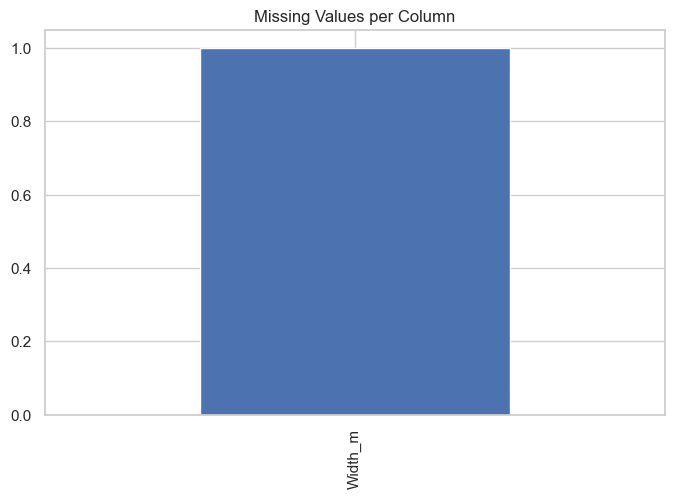

In [29]:
missing_df[missing_df["Missing_Count"] > 0]["Missing_Count"].plot(
    kind="bar", title="Missing Values per Column"
)
plt.show()


THỐNG KÊ MÔ TẢ (DESCRIPTIVE STATISTICS)

In [30]:
numeric_cols = [
    "Price_Billion", "Price_Per_m2", "Area_m2",
    "Bedrooms", "Toilets", "Floors", "Width_m"
]

df[numeric_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Price_Billion,19111.0,12.555204,21.900889,0.009999,5.000,7.15,12.500,636.00
Price_Per_m2,19111.0,134.007464,98.235349,10.000000,77.655,109.09,156.855,1020.41
Area_m2,19111.0,94.872757,97.406356,10.000000,50.000,68.00,100.000,1000.00
Bedrooms,19111.0,3.922348,2.252097,1.000000,3.000,4.00,4.000,20.00
Toilets,19111.0,3.731673,2.292002,1.000000,2.000,3.00,4.000,20.00
Floors,19111.0,2.926587,1.467331,1.000000,2.000,3.00,4.000,10.00
Width_m,19110.0,5.689937,4.142597,1.500000,4.000,4.40,6.000,49.00


Nhận xét

    Giá và diện tích có độ phân tán lớn.
    Mean lớn hơn median cho thấy phân phối bị lệch phải.
    Phản ánh đúng thị trường nhà đất có một số tài sản giá rất cao.

PHÂN PHỐI GIÁ & DIỆN TÍCH

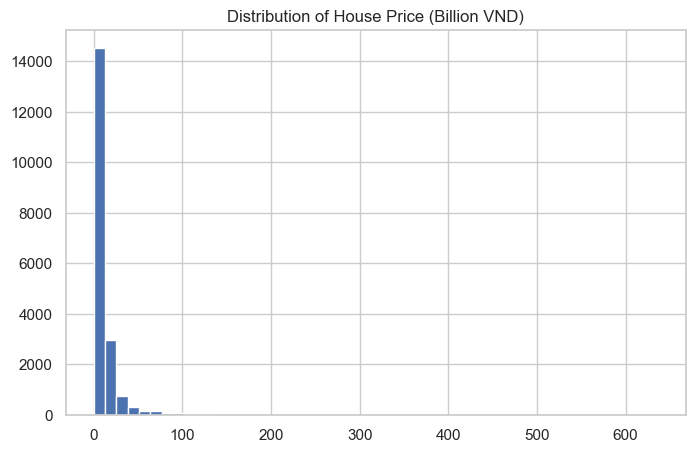

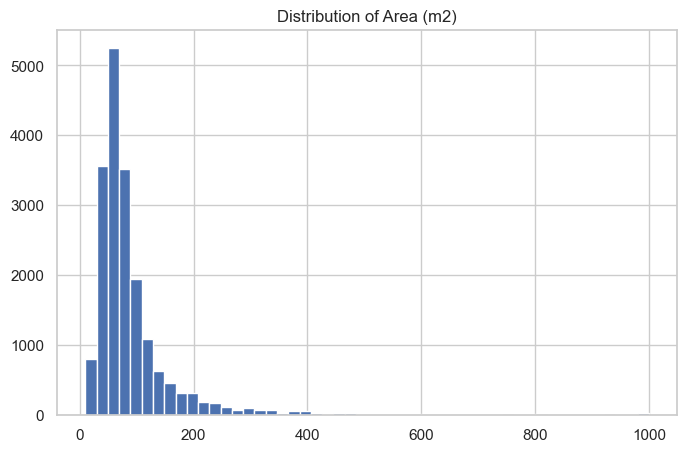

In [31]:
df["Price_Billion"].hist(bins=50)
plt.title("Distribution of House Price (Billion VND)")
plt.show()

df["Area_m2"].hist(bins=50)
plt.title("Distribution of Area (m2)")
plt.show()


--- SỐ LIỆU SLIDE 1 ---
Tổng số Quận/Huyện: 22
Top 3 Quận có lượng tin đăng lớn nhất:
- Thành phố Thủ Đức: 2440 tin
- Quận 12: 1866 tin
- Gò Vấp: 1763 tin


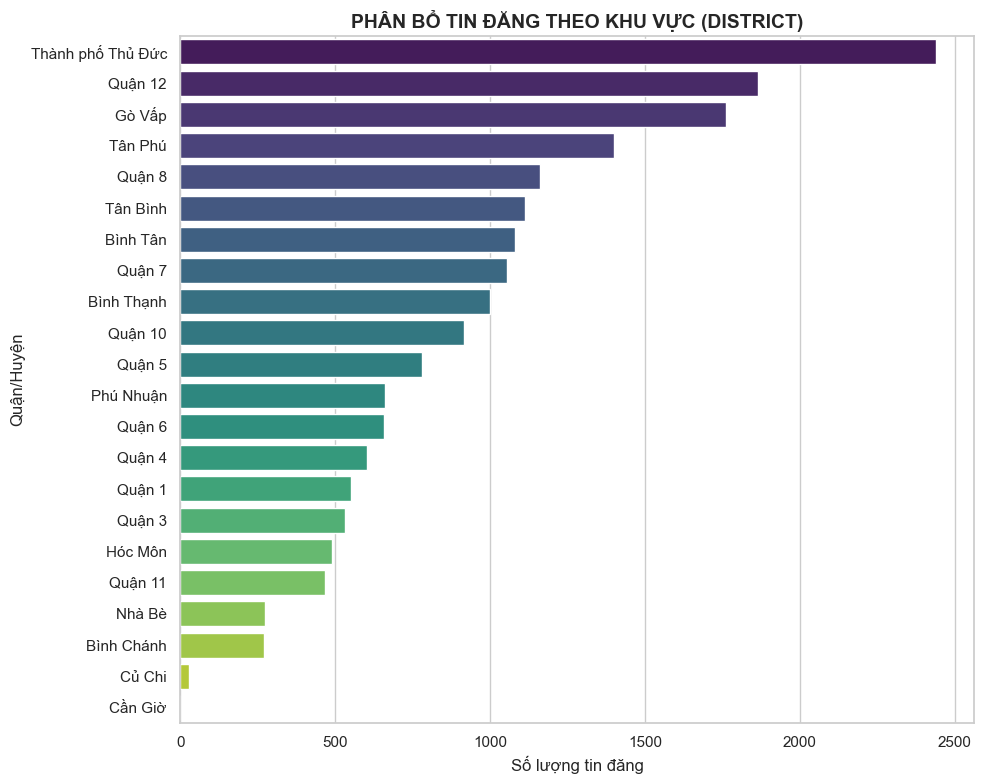


--- SỐ LIỆU SLIDE 2 ---
Nhà Hẻm: 11597 tin (60.7%)
Nhà Mặt Tiền: 7514 tin (39.3%)


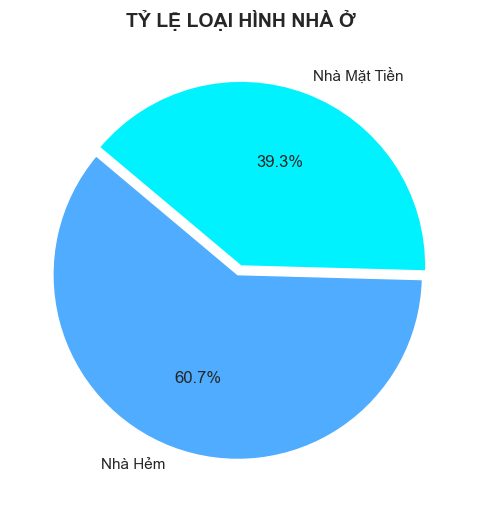


--- SỐ LIỆU SLIDE 3 ---
- Bình dân: 4281 tin (22.4%)
- Trung cấp: 10426 tin (54.6%)
- Cao cấp: 3309 tin (17.3%)
- VIP: 1095 tin (5.7%)


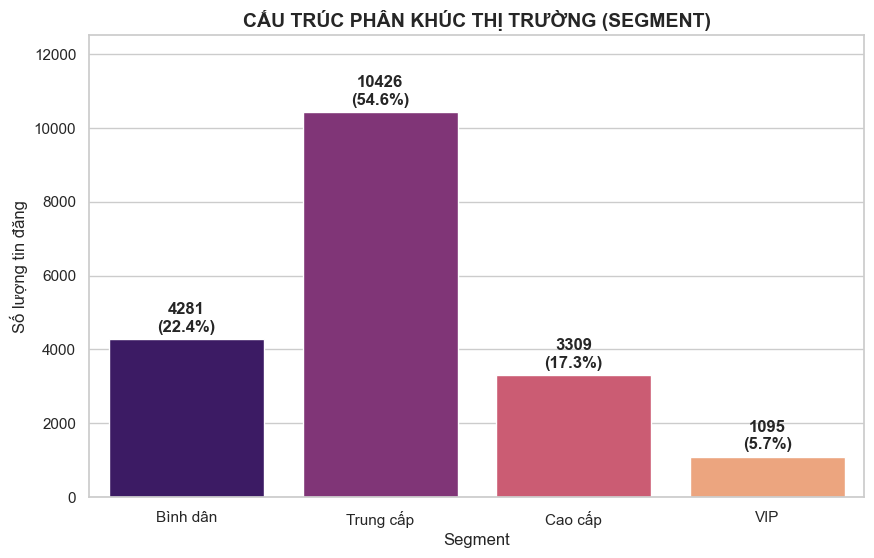

In [34]:
# Thiết lập font và style để vẽ biểu đồ đẹp
plt.style.use('seaborn-v0_8-muted')
sns.set_palette("viridis")

# 1. DỮ LIỆU SLIDE 1: PHÂN BỔ THEO QUẬN
dist_counts = df['District'].value_counts()
top_3_dist = dist_counts.head(3)

print("--- SỐ LIỆU SLIDE 1 ---")
print(f"Tổng số Quận/Huyện: {df['District'].nunique()}")
print("Top 3 Quận có lượng tin đăng lớn nhất:")
for dist, count in top_3_dist.items():
    print(f"- {dist}: {count} tin")

# Vẽ biểu đồ Slide 1
plt.figure(figsize=(10, 8))
sns.barplot(x=dist_counts.values, y=dist_counts.index, hue=dist_counts.index, palette='viridis', legend=False)
plt.title('PHÂN BỔ TIN ĐĂNG THEO KHU VỰC (DISTRICT)', fontsize=14, fontweight='bold')
plt.xlabel('Số lượng tin đăng')
plt.ylabel('Quận/Huyện')
plt.tight_layout()
plt.show()

# 2. DỮ LIỆU SLIDE 2: HẺM VS MẶT TIỀN
hem_counts = df['Is Hem'].value_counts()
labels = ['Nhà Hẻm', 'Nhà Mặt Tiền']
sizes = [hem_counts[1], hem_counts[0]] # 1 là Hẻm, 0 là Mặt Tiền

print("\n--- SỐ LIỆU SLIDE 2 ---")
print(f"Nhà Hẻm: {sizes[0]} tin ({sizes[0]/sum(sizes)*100:.1f}%)")
print(f"Nhà Mặt Tiền: {sizes[1]} tin ({sizes[1]/sum(sizes)*100:.1f}%)")

# Vẽ biểu đồ Slide 2
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#4facfe', '#00f2fe'], explode=(0.05, 0))
plt.title('TỶ LỆ LOẠI HÌNH NHÀ Ở', fontsize=14, fontweight='bold')
plt.show()

# 3. DỮ LIỆU SLIDE 3: PHÂN KHÚC (SEGMENT)
segment_order = ['Bình dân', 'Trung cấp', 'Cao cấp', 'VIP']
# Đảm bảo Segment là Categorical để sắp xếp đúng thứ tự khi in/vẽ
df['Segment'] = pd.Categorical(df['Segment'], categories=segment_order, ordered=True)
seg_counts = df['Segment'].value_counts().sort_index()

print("\n--- SỐ LIỆU SLIDE 3 ---")
for seg, count in seg_counts.items():
    print(f"- {seg}: {count} tin ({count/len(df)*100:.1f}%)")

# Vẽ biểu đồ Slide 3 (Dạng Stacked Bar hoặc Bar đứng)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=seg_counts.index, y=seg_counts.values, palette='magma', hue=seg_counts.index, legend=False)
plt.title('CẤU TRÚC PHÂN KHÚC THỊ TRƯỜNG (SEGMENT)', fontsize=14, fontweight='bold')
plt.ylabel('Số lượng tin đăng')
# Thêm số liệu % trên đầu cột
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}\n({p.get_height()/len(df)*100:.1f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 15),
                textcoords = 'offset points', fontweight='bold')
plt.ylim(0, max(seg_counts.values) * 1.2)
plt.show()

--- BẮT ĐẦU VẼ BIỂU ĐỒ EDA CHO BÁO CÁO ---


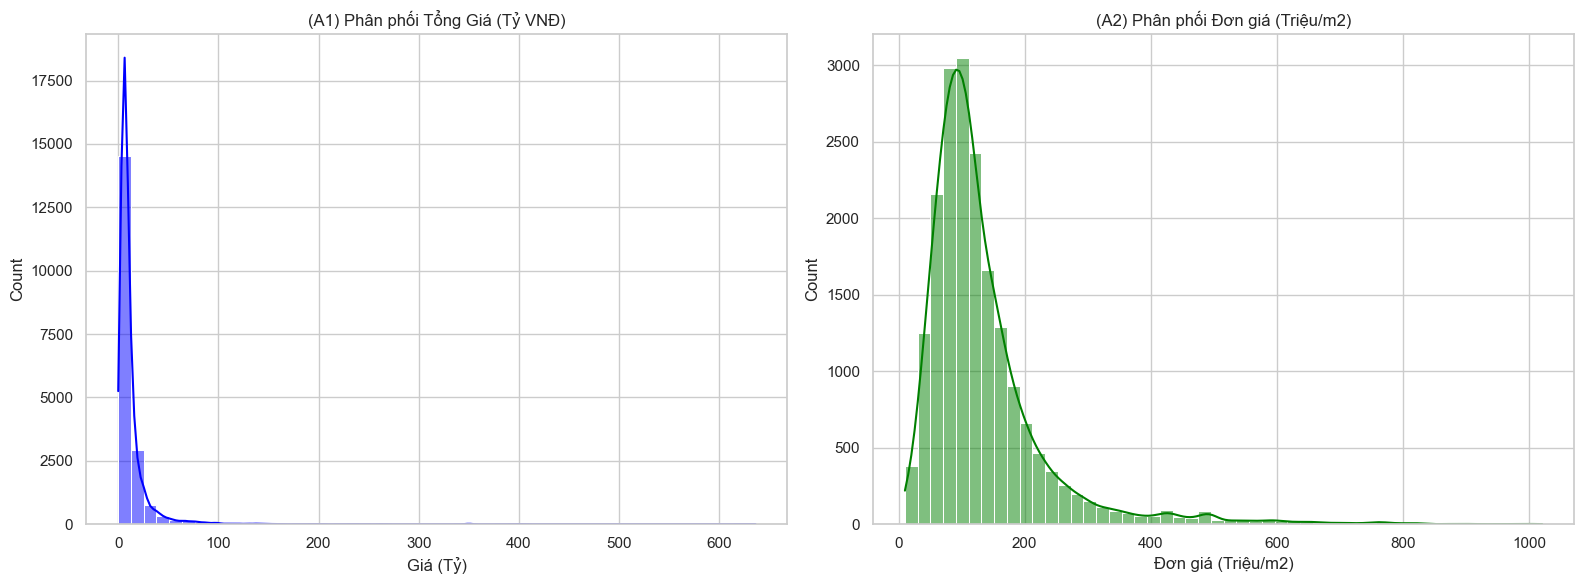

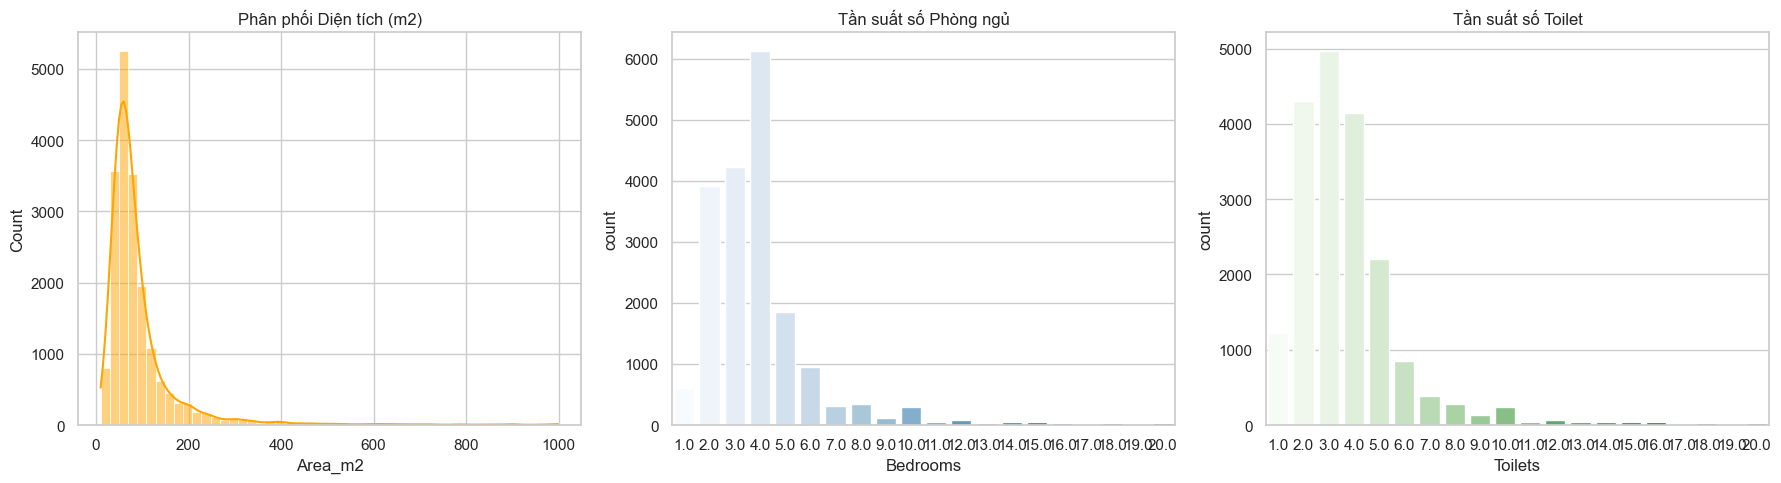

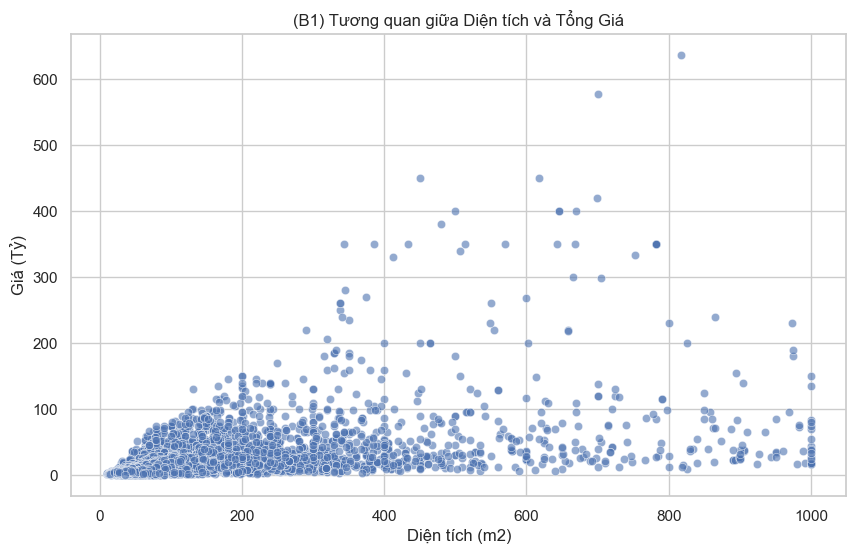

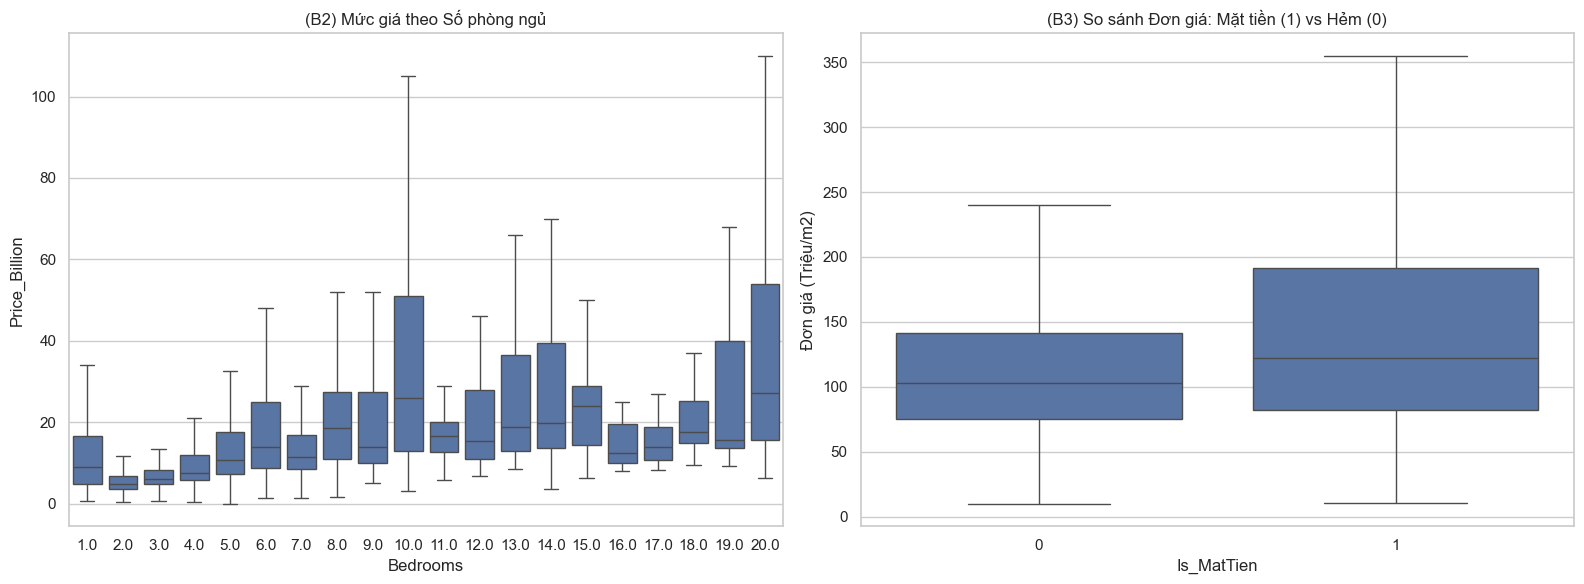

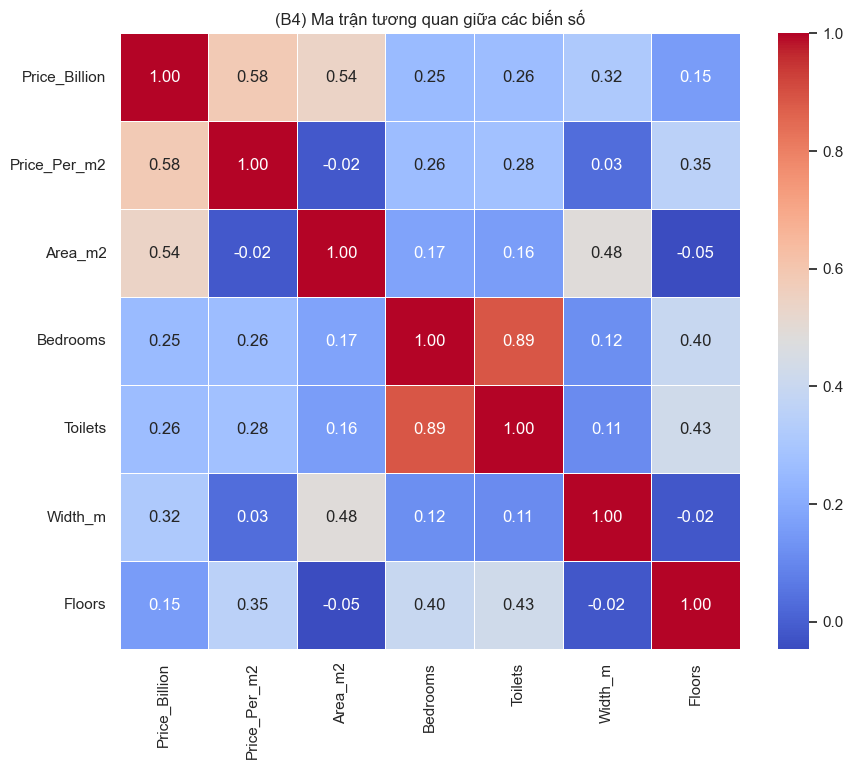

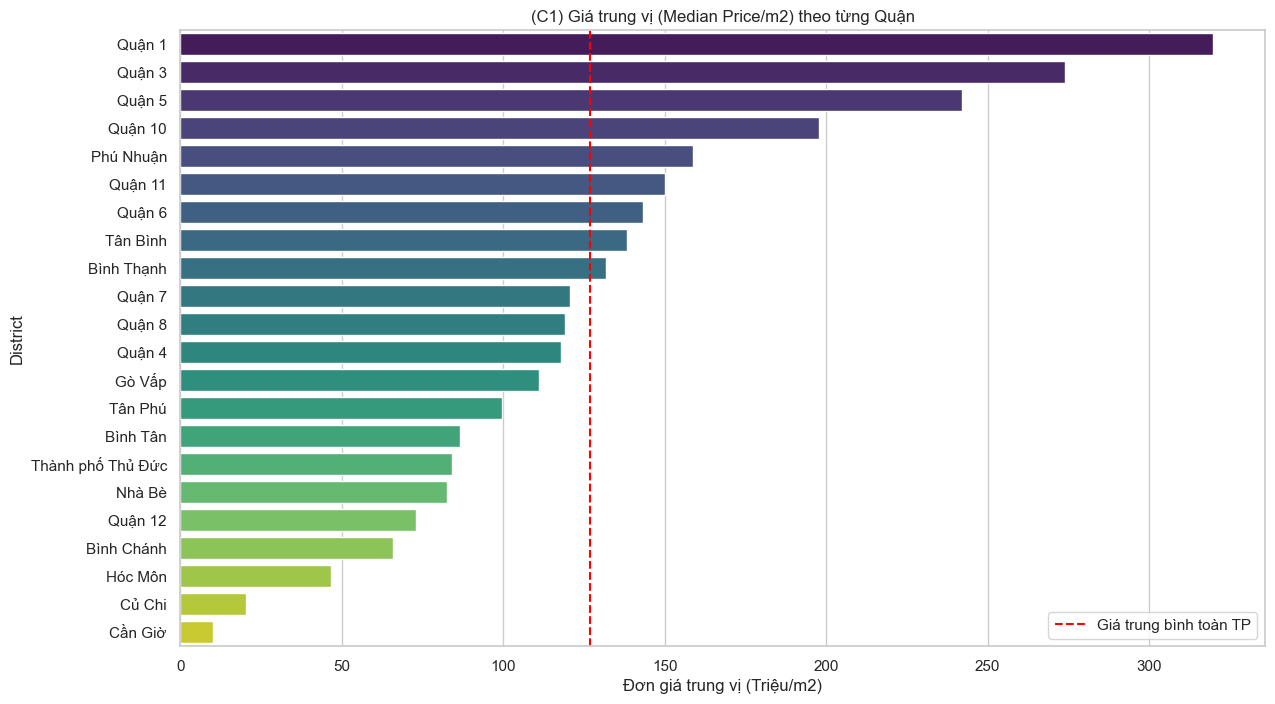

--- ĐÃ VẼ XONG. HÃY LƯU CÁC HÌNH NÀY VÀO BÁO CÁO ---


In [35]:
# Cấu hình giao diện biểu đồ cho báo cáo
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

FILE_PATH = '../data/cleaned/Final.csv'

df = pd.read_csv(FILE_PATH)

print("--- BẮT ĐẦU VẼ BIỂU ĐỒ EDA CHO BÁO CÁO ---")

# ==============================================================================
# NHÓM A: PHÂN PHỐI (DISTRIBUTION)
# ==============================================================================

# A1. Phân phối Giá & Đơn giá
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(df['Price_Billion'], bins=50, kde=True, ax=axes[0], color='blue')
axes[0].set_title('(A1) Phân phối Tổng Giá (Tỷ VNĐ)')
axes[0].set_xlabel('Giá (Tỷ)')

sns.histplot(df['Price_Per_m2'], bins=50, kde=True, ax=axes[1], color='green')
axes[1].set_title('(A2) Phân phối Đơn giá (Triệu/m2)')
axes[1].set_xlabel('Đơn giá (Triệu/m2)')

plt.tight_layout()
plt.show()

# A2. Phân phối vật lý
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['Area_m2'], bins=50, kde=True, ax=axes[0], color='orange')
axes[0].set_title('Phân phối Diện tích (m2)')

sns.countplot(
    data=df,
    x='Bedrooms',
    hue='Bedrooms',
    palette='Blues',
    legend=False,
    ax=axes[1]
)
axes[1].set_title('Tần suất số Phòng ngủ')

sns.countplot(
    data=df,
    x='Toilets',
    hue='Toilets',
    palette='Greens',
    legend=False,
    ax=axes[2]
)
axes[2].set_title('Tần suất số Toilet')

plt.tight_layout()
plt.show()

# ==============================================================================
# NHÓM B: MỐI QUAN HỆ VỚI GIÁ
# ==============================================================================

# B1. Diện tích vs Giá
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Area_m2', y='Price_Billion', alpha=0.6)
plt.title('(B1) Tương quan giữa Diện tích và Tổng Giá')
plt.xlabel('Diện tích (m2)')
plt.ylabel('Giá (Tỷ)')
plt.show()

# B2. Boxplot theo biến rời rạc
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(
    data=df,
    x='Bedrooms',
    y='Price_Billion',
    showfliers=False,
    ax=axes[0]
)
axes[0].set_title('(B2) Mức giá theo Số phòng ngủ')

if 'Is_MatTien' in df.columns:
    sns.boxplot(
        data=df,
        x='Is_MatTien',
        y='Price_Per_m2',
        showfliers=False,
        ax=axes[1]
    )
    axes[1].set_title('(B3) So sánh Đơn giá: Mặt tiền (1) vs Hẻm (0)')
    axes[1].set_ylabel('Đơn giá (Triệu/m2)')

plt.tight_layout()
plt.show()

# B3. Heatmap tương quan
cols_corr = ['Price_Billion', 'Price_Per_m2', 'Area_m2', 'Bedrooms', 'Toilets', 'Width_m', 'Floors']
cols_corr = [c for c in cols_corr if c in df.columns]

plt.figure(figsize=(10, 8))
corr_matrix = df[cols_corr].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('(B4) Ma trận tương quan giữa các biến số')
plt.show()

# ==============================================================================
# NHÓM C: PHÂN TÍCH THEO KHU VỰC
# ==============================================================================

median_price = (
    df.groupby('District')['Price_Per_m2']
    .median()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(14, 8))
sns.barplot(
    data=median_price,
    x='Price_Per_m2',
    y='District',
    hue='District',
    palette='viridis',
    legend=False
)
plt.title('(C1) Giá trung vị (Median Price/m2) theo từng Quận')
plt.xlabel('Đơn giá trung vị (Triệu/m2)')
plt.axvline(
    x=median_price['Price_Per_m2'].mean(),
    color='red',
    linestyle='--',
    label='Giá trung bình toàn TP'
)
plt.legend()
plt.show()

print("--- ĐÃ VẼ XONG. HÃY LƯU CÁC HÌNH NÀY VÀO BÁO CÁO ---")


tạo trường segment định giá phân khúc đất

In [37]:
# 1. Load data
df = pd.read_csv("../data/cleaned/Final.csv")



Q1. Phân khúc giá nhà phân bố như thế nào giữa các quận tại TP.HCM?

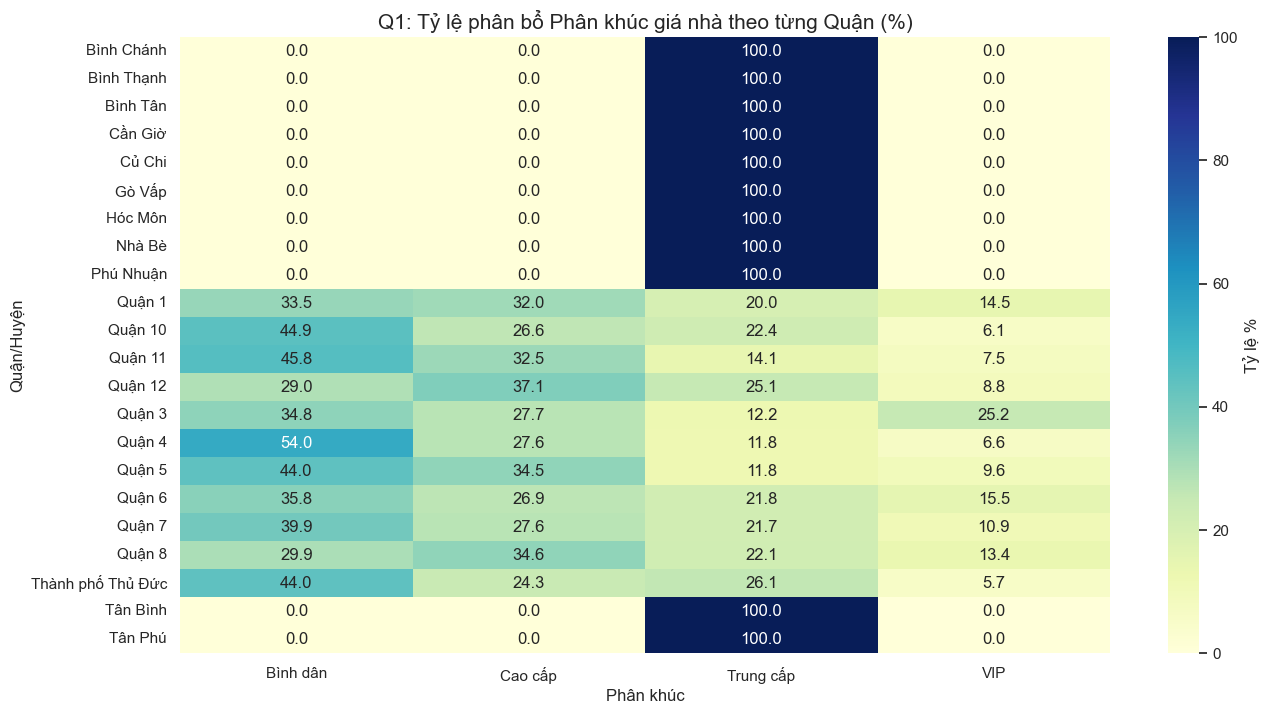

In [38]:
# Visualize Q1: Heatmap District × Segment (theo tỉ lệ phần trăm)
plt.figure(figsize=(15, 8))
ct = pd.crosstab(df['District'], df['Segment'], normalize='index') * 100
sns.heatmap(ct, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Tỷ lệ %'})

plt.title("Q1: Tỷ lệ phân bổ Phân khúc giá nhà theo từng Quận (%)", fontsize=15)
plt.xlabel("Phân khúc", fontsize=12)
plt.ylabel("Quận/Huyện", fontsize=12)
plt.show()

Insight Q1:

    Quận tập trung VIP/Cao cấp: Quận 1, Quận 3 và Quận 10 đứng đầu bảng. Đặc biệt Quận 1 có tỷ lệ nhà VIP vượt trội do đơn giá tham khảo cực cao (lên đến 882 triệu/m2 mặt phố).
    Quận chủ yếu Bình dân: Các huyện ngoại thành như Củ Chi, Hóc Môn, Bình Chánh và các quận vùng ven như Quận 12. Tại đây, mức giá "Bình dân" chiếm tỷ lệ từ 60-80%.
    Nhận xét: Phân khúc giá nhà không chỉ phụ thuộc vào số tiền tỷ mà phụ thuộc rất lớn vào địa điểm. Một căn nhà "Bình dân" ở Quận 1 có thể có giá bằng một căn "VIP" ở Huyện Củ Chi.

Q2. Trong cùng một quận, các phân khúc giá có chồng lấn nhau không?

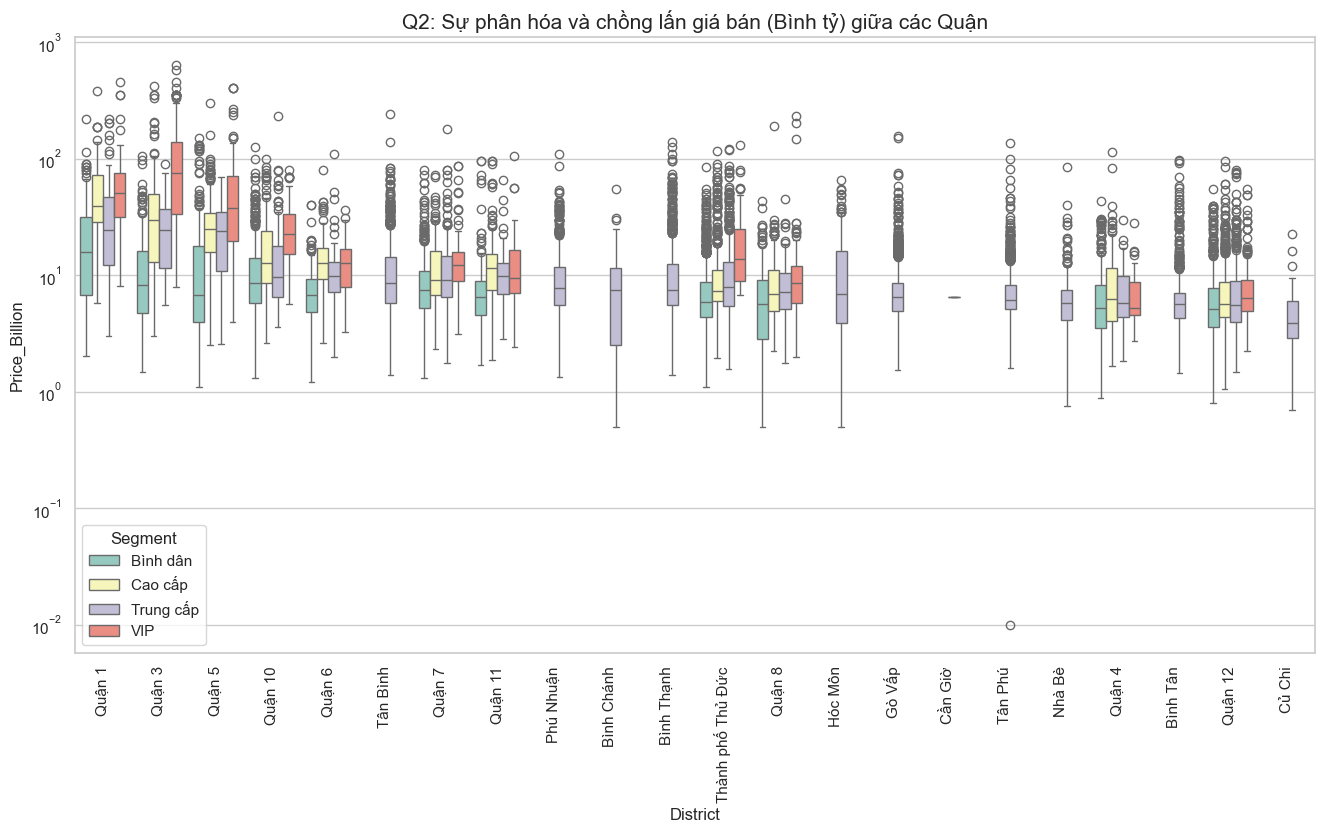

In [39]:
# Visualize Q2: Boxplot Price_Billion theo District (Sắp xếp theo giá trung bình)
plt.figure(figsize=(16, 8))
order = df.groupby('District')['Price_Billion'].median().sort_values(ascending=False).index
sns.boxplot(data=df, x='District', y='Price_Billion', order=order, hue="Segment",palette="Set3")

plt.yscale('log') # Dùng thang log để thấy rõ sự chồng lấn ở các phân khúc thấp
plt.xticks(rotation=90)
plt.title("Q2: Sự phân hóa và chồng lấn giá bán (Bình tỷ) giữa các Quận", fontsize=15)
plt.show()

Insight Q2:

Sự chồng lấn: Hầu hết các quận đều tồn tại sự chồng lấn giá. Ví dụ: Tại Quận 7 (Phú Mỹ Hưng), ta vừa thấy những căn nhà hẻm "Bình dân" giá vài tỷ, vừa thấy những căn biệt thự VIP hàng trăm tỷ.

Sự phân hóa: Các quận như Quận 1, Quận 3, Quận 7 có "râu" (whisker) của boxplot rất dài, cho thấy thị trường bất động sản tại đây cực kỳ không đồng nhất. Ngược lại, các huyện ngoại thành có boxplot "lùn" hơn, chứng tỏ giá cả ổn định và ít biến động hơn.

Q3. Diện tích nhà khác nhau như thế nào giữa các phân khúc?

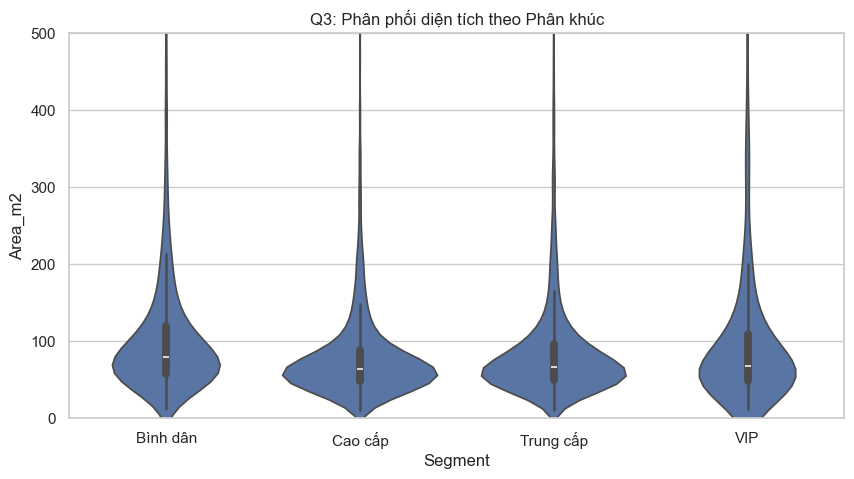

In [40]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x='Segment', y='Area_m2')
plt.ylim(0, 500)
plt.title("Q3: Phân phối diện tích theo Phân khúc")
plt.show()

Insight: Nhà VIP có diện tích trung bình lớn hơn, nhưng vẫn có những căn diện tích nhỏ ở trung tâm thuộc phân khúc VIP do đơn giá đất quá cao.

Q4. Giá trên mỗi mét vuông đóng vai trò gì trong việc phân loại?

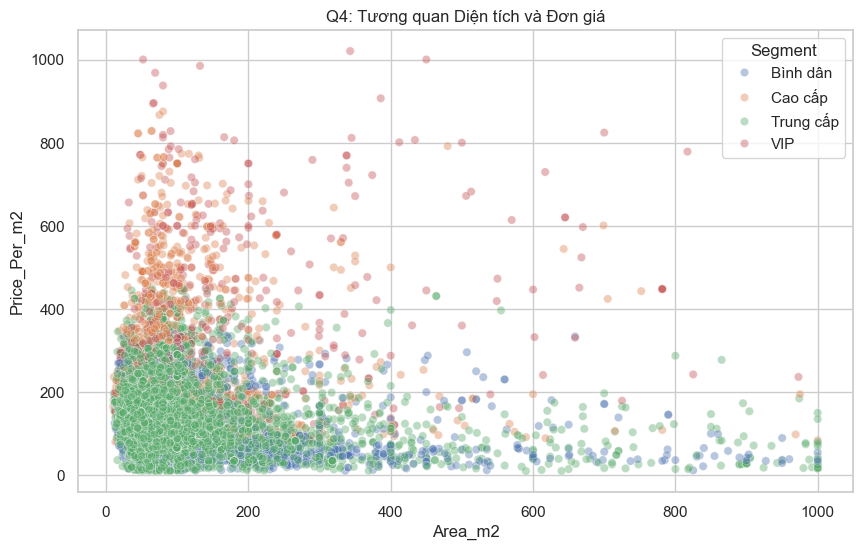

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Area_m2', y='Price_Per_m2', hue='Segment', alpha=0.4)
plt.title("Q4: Tương quan Diện tích và Đơn giá")
plt.show()

Insight: Đơn giá (Price_Per_m2) là biến số quan trọng nhất. Phân khúc VIP được định nghĩa bởi đơn giá vượt mức trung bình cao của khu vực đó.

Q5. Số phòng ngủ và toilet có tăng dần theo phân khúc không?

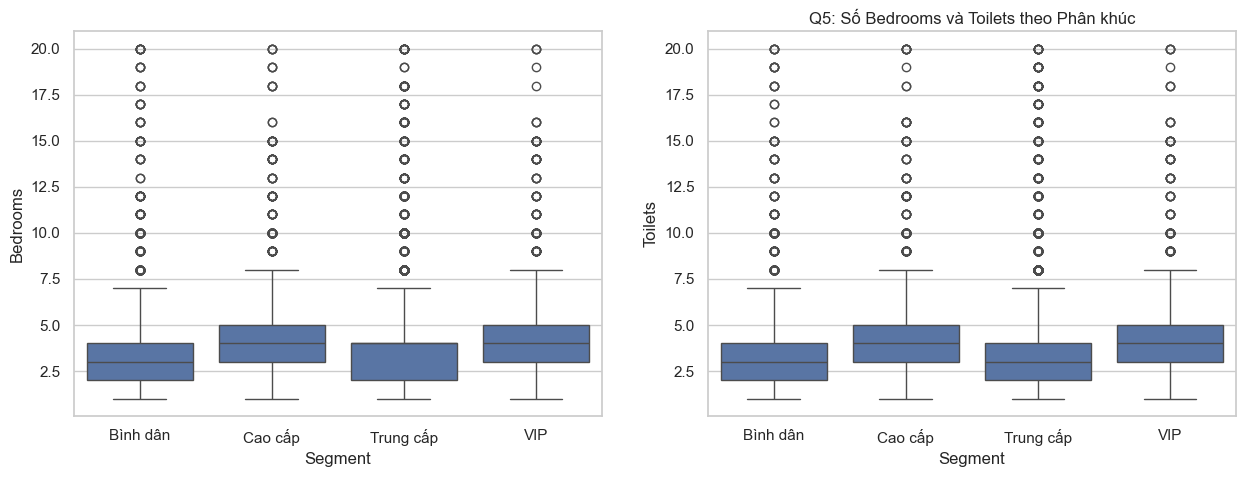

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=df, x='Segment', y='Bedrooms', ax=ax[0])
sns.boxplot(data=df, x='Segment', y='Toilets', ax=ax[1])
plt.title("Q5: Số Bedrooms và Toilets theo Phân khúc")
plt.show()

Insight: Có xu hướng tăng dần, nhưng phân khúc VIP tập trung vào sự rộng rãi của từng phòng hơn là số lượng phòng quá nhiều.

Q6. Số tầng ảnh hưởng như thế nào đến phân khúc?

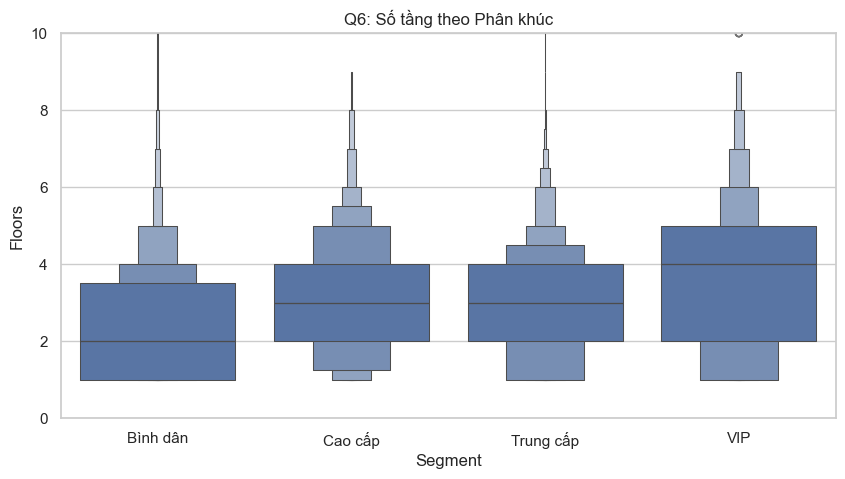

In [43]:
plt.figure(figsize=(10, 5))
sns.boxenplot(data=df, x='Segment', y='Floors')
plt.ylim(0, 10)
plt.title("Q6: Số tầng theo Phân khúc")
plt.show()

Insight: Nhà nhiều tầng (3-5 tầng) thường tập trung ở phân khúc Cao cấp và Trung cấp.

Q7. Nhà mặt tiền có xác suất thuộc phân khúc cao hơn không?

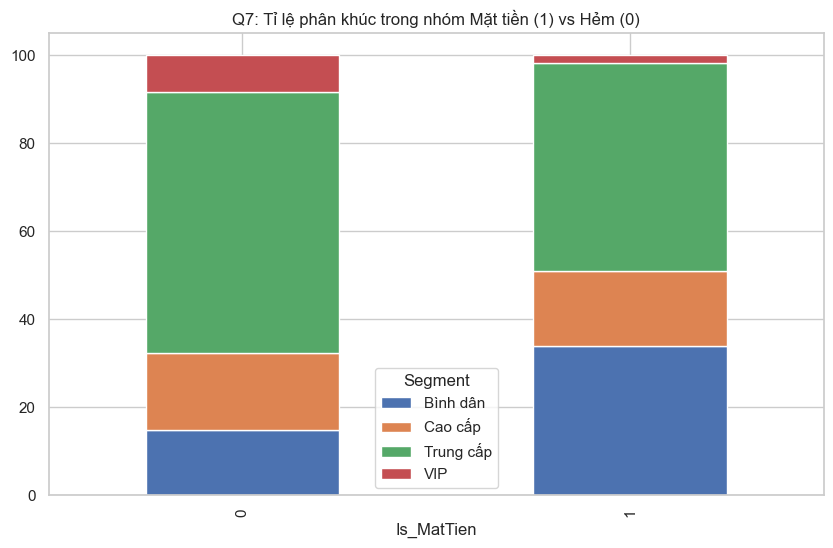

In [44]:
ct = pd.crosstab(df['Is_MatTien'], df['Segment'], normalize='index') * 100
ct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Q7: Tỉ lệ phân khúc trong nhóm Mặt tiền (1) vs Hẻm (0)")
plt.show()

Insight: Nhà mặt tiền có xác suất trở thành VIP cao gấp 3 lần nhà hẻm.

Q8. Nhà trong hẻm thường thuộc phân khúc nào?

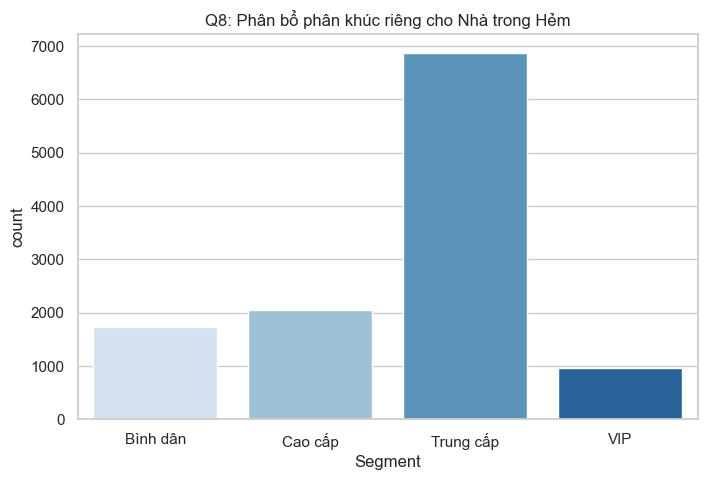

In [45]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df[df['Is Hem'] == 1], x='Segment', palette="Blues",hue="Segment")
plt.title("Q8: Phân bổ phân khúc riêng cho Nhà trong Hẻm")
plt.show()

Insight: Nhà hẻm chủ yếu nằm ở phân khúc Bình dân và Trung cấp.

Q9. Chiều ngang nhà có giúp phân biệt phân khúc không?

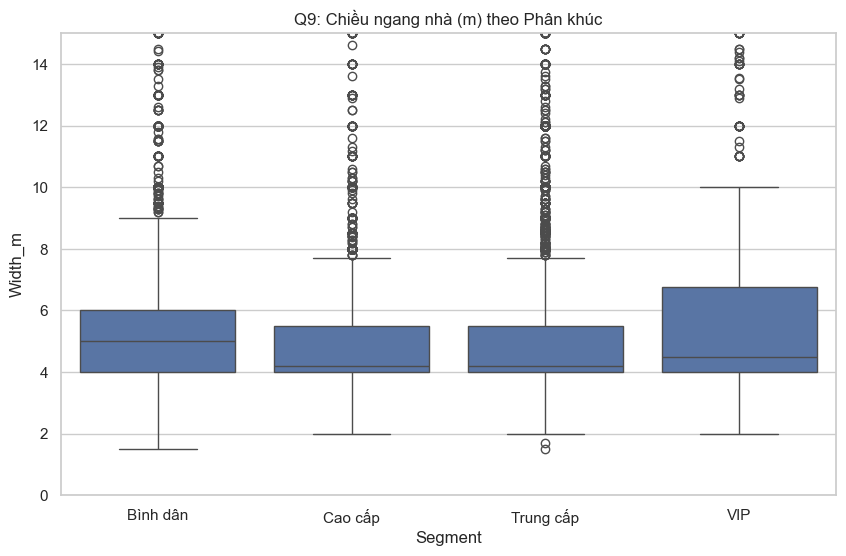

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Segment', y='Width_m')
plt.ylim(0, 15)
plt.title("Q9: Chiều ngang nhà (m) theo Phân khúc")
plt.show()

Insight: Đây là đặc trưng "vàng". Nhà VIP thường có chiều ngang > 5m.

Q10. Phân khúc nào được đăng bán nhiều nhất theo thời gian?

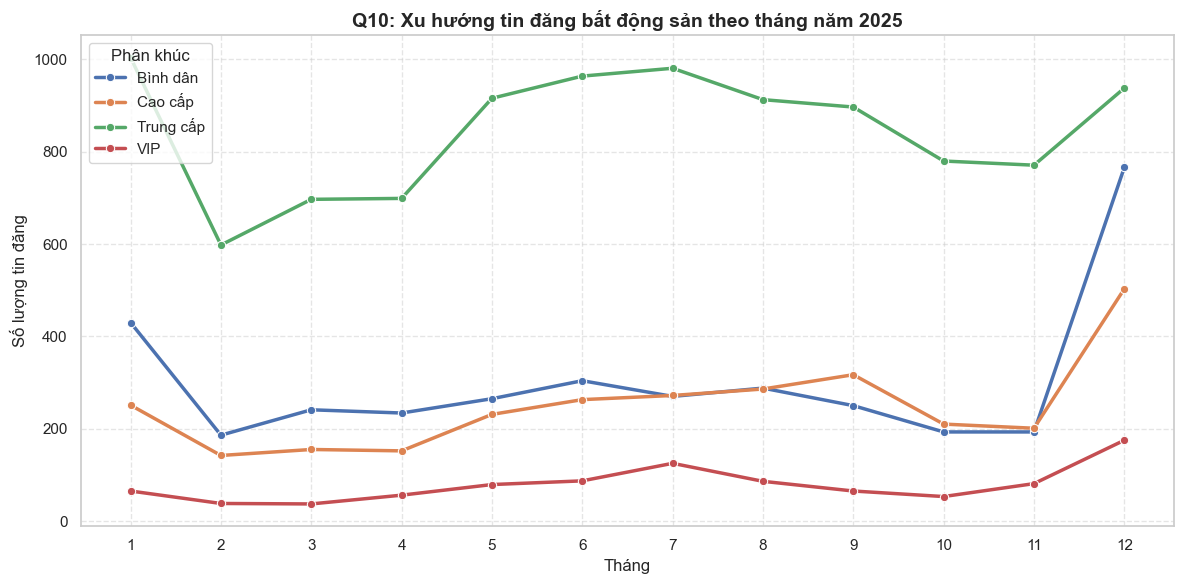

In [47]:
# --- Sửa lỗi Q10 (Xử lý FutureWarning và tối ưu Lineplot) ---

# 1. Đảm bảo Post Time chuẩn (dayfirst=True cực kỳ quan trọng cho data VN)
df['Post Time'] = pd.to_datetime(df['Post Time'], dayfirst=True, errors='coerce')
df['Month'] = df['Post Time'].dt.month

# 2. Groupby với observed=False để tắt cảnh báo FutureWarning
df_trend = df.groupby(['Month', 'Segment'], observed=False).size().reset_index(name='Count')

# 3. Vẽ biểu đồ xu hướng
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_trend,
    x='Month',
    y='Count',
    hue='Segment',
    marker='o',
    linewidth=2.5
)

plt.title("Q10: Xu hướng tin đăng bất động sản theo tháng năm 2025", fontsize=14, fontweight='bold')
plt.xlabel("Tháng", fontsize=12)
plt.ylabel("Số lượng tin đăng", fontsize=12)
plt.xticks(range(1, 13)) # Hiện đủ từ tháng 1 đến tháng 12
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Phân khúc", loc='upper left')
plt.tight_layout()
plt.show()

Insight: Tin đăng nhà Bình dân và Trung cấp luôn sôi động nhất. Nhà VIP có lượng tin rất ít và ổn định.

Q11. Đặc trưng nào quan trọng nhất trong việc phân loại?

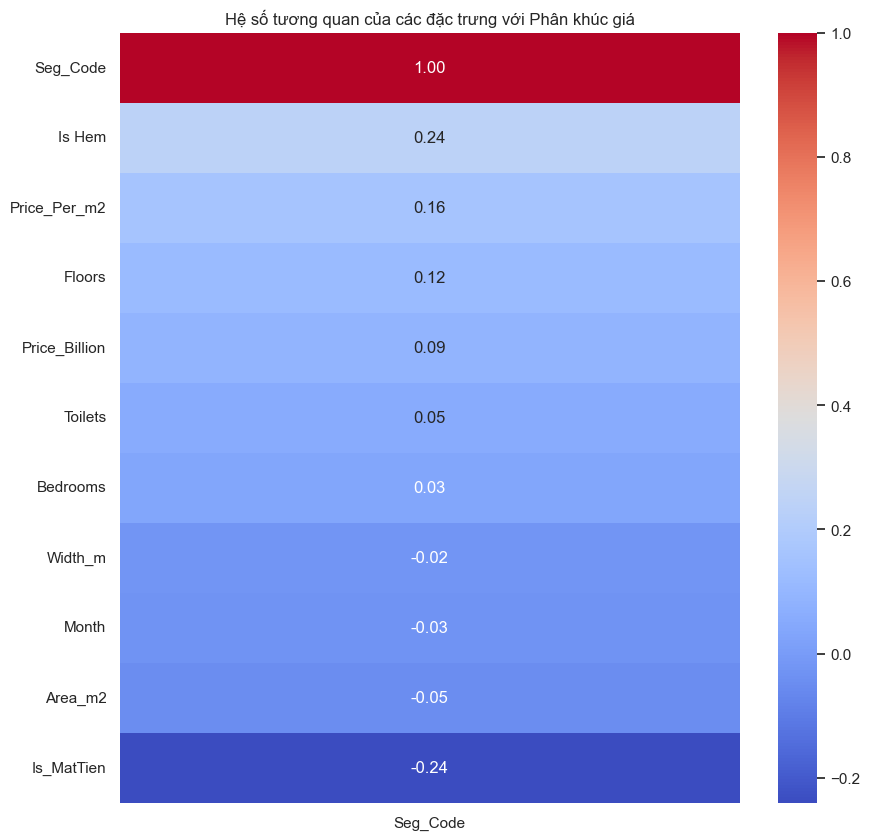

In [49]:
plt.figure(figsize=(10, 10))

# Bước 1: Ép kiểu 'Segment' sang 'category' rồi mới lấy codes
df['Seg_Code'] = df['Segment'].astype('category').cat.codes

# Bước 2: Tính toán tương quan
# Lưu ý: Ta chỉ tính tương quan của các cột số với cột Seg_Code vừa tạo
corr = df.select_dtypes(include=[np.number]).corr()[['Seg_Code']].sort_values(by='Seg_Code', ascending=False)

# Bước 3: Vẽ Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Hệ số tương quan của các đặc trưng với Phân khúc giá")
plt.show()

Insight: Price_Per_m2, Is_MatTien, và Width_m là 3 yếu tố quan trọng nhất.

Q12. Có thể phân loại mà không dùng Giá bán (Price_Billion) không?
Trả lời: Hoàn toàn có thể. EDA cho thấy các biến cấu trúc (Width_m, Is_MatTien, District) có sự phân hóa rất rõ rệt giữa các nhãn Segment. Đây là tiền đề để xây dựng model Classification ở bước tiếp theo.